In [1]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('AMZN.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-09-21,544.330017,549.780029,539.590027,548.390015,548.390015,3283300
1,2015-09-22,539.710022,543.549988,532.659973,538.400024,538.400024,3841700
2,2015-09-23,538.299988,541.210022,534.000000,536.070007,536.070007,2237600
3,2015-09-24,530.549988,534.559998,522.869995,533.750000,533.750000,3501000
4,2015-09-25,542.570007,542.799988,521.400024,524.250000,524.250000,4031000


In [3]:
forecast_out=10

In [4]:
dates=np.array(df['Date'])
dates=dates[-forecast_out:]
dates

array(['2020-11-30', '2020-12-01', '2020-12-02', '2020-12-03',
       '2020-12-04', '2020-12-07', '2020-12-08', '2020-12-09',
       '2020-12-10', '2020-12-11'], dtype=object)

In [5]:
df=df[['Adj Close']]

In [6]:
df['Prediction']=df['Adj Close'].shift(-forecast_out)

In [7]:
#Independent dataset
X=np.array(df[['Adj Close']])
X=X[:-forecast_out]
print(X)

[[ 548.390015]
 [ 538.400024]
 [ 536.070007]
 ...
 [3118.060059]
 [3185.070068]
 [3195.340088]]


In [8]:
#Dependent dataset
Y=np.array(df['Prediction'])
Y=Y[:-forecast_out]
print(Y)

[ 543.679993  537.47998   541.940002 ... 3104.199951 3101.48999
 3116.419922]


In [9]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

In [10]:
svrrbf=SVR(kernel='rbf',C=1e3,gamma=0.01)
svrrbf.fit(x_train,y_train)
svrlin=SVR(kernel='linear',C=1e3)
svrlin.fit(x_train,y_train)
svrpoly=SVR(kernel='poly',C=1e3,degree=2)
svrpoly.fit(x_train,y_train)

SVR(C=1000.0, degree=2, kernel='poly')

In [11]:
svrrbf_score=svrrbf.score(x_test,y_test)
print(svrrbf_score)
svrlin_score=svrlin.score(x_test,y_test)
print(svrlin_score)
svrpoly_score=svrpoly.score(x_test,y_test)
print(svrpoly_score)

0.9536169191065282
0.9351488825005115
0.9046251937880815


In [12]:
x_forecast=np.array(df[['Adj Close']])[-forecast_out:]
x_forecast

array([[3168.040039],
       [3220.080078],
       [3203.530029],
       [3186.72998 ],
       [3162.580078],
       [3158.      ],
       [3177.290039],
       [3104.199951],
       [3101.48999 ],
       [3116.419922]])

In [13]:
svrrbf_prediction=svrrbf.predict(x_forecast)
svrlin_prediction=svrlin.predict(x_forecast)
svrpoly_prediction=svrpoly.predict(x_forecast)

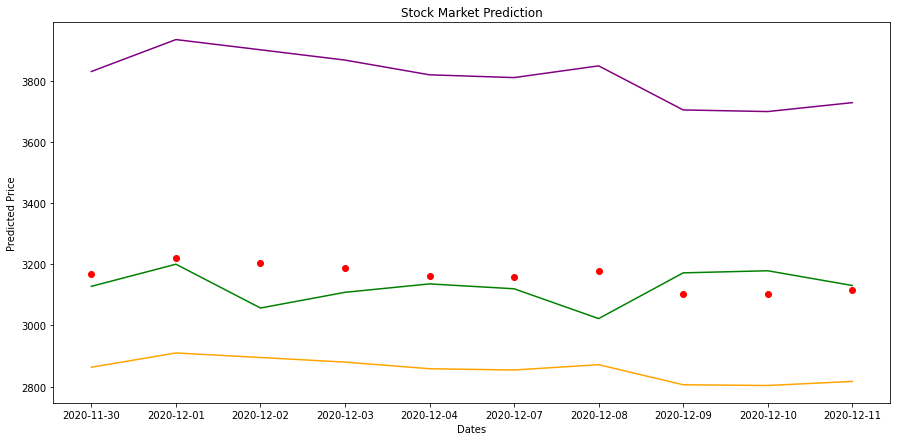

In [14]:
plt.figure(figsize=(15,7))
plt.scatter(dates,x_forecast,color='red',label='Original Data')
plt.plot(dates,svrrbf.predict(x_forecast),color='green',label='RBF Model')
plt.plot(dates,svrlin.predict(x_forecast),color='orange',label='Linear Model')
plt.plot(dates,svrpoly.predict(x_forecast),color='purple',label='Polynomial Model')
plt.xlabel('Dates')
plt.ylabel('Predicted Price')
plt.title('Stock Market Prediction')
plt.legend
plt.show()